# Author

Created by HakHyeon Song.

Artificial Intelligence, Fall Semester, 2021.

## k-근접 이웃 (k-nearest neighbor, KNN) 

**입력, 결과가 있는 데이터들이 주어진 상황에서, 새로운 입력에 대한 결과를 추정할 때, <br>
결과를 아는 최근접한 k개의 데이터에 대한 결과정보를 이용하는 방법**

1. 데이터간의 거리 계산
2. 근접이웃 탐색 
3. 근접 이웃 k개로 부터 결과를 추정  

### Libraries 불러오기 ###

In [19]:
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 데이터 생성 ###
- 랜덤 데이터 생성 
- 3개의 중심을 기준으로 정규 분포를 따르는 임의의 데이터 생성 
- 각 중심으로 생성된 데이터에 대해 Label 부여 

<AxesSubplot:>

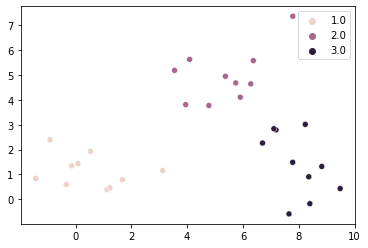

In [20]:
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

data = np.random.randn(10,2) + center_1
data = np.concatenate((data, np.random.randn(10,2) + center_2))
data = np.concatenate((data, np.random.randn(10,2) + center_3))

cluster = np.ones(10)
cluster = np.concatenate((cluster, 2*np.ones(10)))
cluster = np.concatenate((cluster, 3*np.ones(10)))

sns.scatterplot(data[:,0], data[:, 1], hue=cluster)

### 새로운 데이터 입력 ###

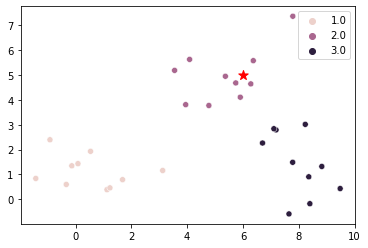

In [21]:
data_new = [6, 5]
data_new = np.asarray(data_new)

sns.scatterplot(data[:,0], data[:, 1], hue=cluster)
plt.scatter(data_new[0], data_new[1], marker='*', c='r', s=100)

### 1. 데이터간의 거리 계산 ###

In [22]:
temp_x = data[:,0] - data_new[0]
temp_y = data[:,1] - data_new[1]
# print(temp_x)
dists = np.sqrt((temp_x**2) + (temp_y**2))

In [23]:
dists
tmp_dict = {}
for i in dists.tolist():
    tmp_dict[i] = dists.tolist().index(i)

In [24]:
np_sorted = np.sort(dists)
np_sorted
values = np_sorted[:3]
# print(values)

index_list = []

for i in values:
    index_list.append(tmp_dict.get(i))

# print(index_list)

In [25]:
##
print('index : ', end=' ')
print(index_list, end=' ')
print(' values : ', end=' ')
print(values)

index :  [14, 11, 17]  values :  [0.41200435 0.45205078 0.63401398]


### 2. 근접이웃 탐색 ###

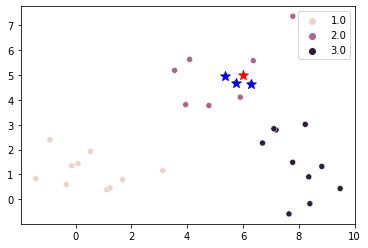

In [26]:
sns.scatterplot(data[:,0], data[:, 1], hue=cluster)
plt.scatter(data_new[0], data_new[1], marker='*', c='r', s=100)
for i in index_list:
    new_mark = data[i]
    plt.scatter(new_mark[0], new_mark[1], marker='*', c='b', s=100)

### 3. 근접 이웃 k개로 부터 결과를 추정 ###

In [27]:
result = dict()
for i in index_list:
    result[cluster[i]] = 1
    if cluster[i] in result:
        result[cluster[i]] += 1

print('예측한 새로운 데이터 label : ', end=' ')
print(max(result, key = result.get))

예측한 새로운 데이터 label :  2.0
